<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Tensorflow/blob/main/Notebooks/Tensorflow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network classification with Tensorflow

in this notebook we are going to performe a model for our classification problem by a special Neural Network

some sort of classification problems :

* multiclass classification
* multilabel calssification
* binary classification



## Prerequirities

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
tf.__version__

'2.12.0'

## Preparing data to fit our model

In [ ]:
# Import
from sklearn.datasets import make_circles

# getting data
X , y = make_circles(n_samples=1000 , noise = 0.03 ,  random_state = 42)
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# a glance of our data
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# using tabel to look at data overview
data_tabel_sample = pd.DataFrame({"x-axis" : X[:5,0] , "y-axis" : X[:5,1] , "color-label" : y[:5]})
data_tabel_sample

,x-axis,y-axis,color-label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


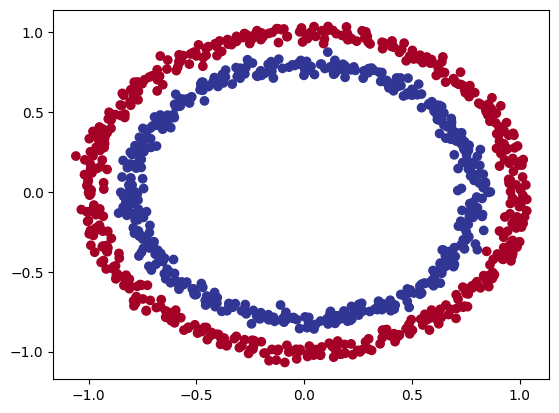

In [ ]:
# visualizing our data
plt.scatter(X[:,0] , X[:,1] , c = y , cmap = plt.cm.RdYlBu) ;

In [ ]:
# # transforming to tensors for model use
# X = tf.constant(X , dtype = tf.float32)
# y = tf.constant(y , dtype = tf.float32)

## Build Model

steps :

1. Create or import a model
2. Compile model
3. Fit model
4. Evaluate model
5. improve through expriment
6. evaluate

and  more again .....


### Trying different models

A - `model_0`

* otput_layer activation **:** `None`
* optimizer : `SGD`
* optimizer learning rate : `0.01`
* epoch : `50`

**Conclusion :**

by not adding activation to our output layer our neural network results would be totally **risky** and ocasionally our results accuracy would stuck at 50 percent

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_0 = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer")
] , name = "model_0")

# 2 . compile model
model_0.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(lr = 0.01),
                metrics = ["accuracy"])

# 3 . fit model
result_0 = model_0.fit(X , y , epochs= 50)

Epoch 1/50
32/32 [==============================] - 3s 8ms/step - loss: 0.8162 - accuracy: 0.4780
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.7359 - accuracy: 0.4570
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7242 - accuracy: 0.4390
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.7149 - accuracy: 0.3900
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.7087 - accuracy: 0.3880
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 0.7022 - accuracy: 0.4430
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6996 - accuracy: 0.4380
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6963 - accuracy: 0.4310
Epoch 9/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.4650
Epoch 10/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 11/50
32/32 [

B - `model_1`

* otput_layer activation **:** `sigmoid`
* optimizer : `Adam`
* optimizer learning rate : `0.01`
* epoch : `50`

**Conclusion :**

also we could add `sigmoid` activation with `Adam` or `SGD` optimizer in this model we choosed `Adam` optimizer

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "Input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer" , activation = "sigmoid")
], name = "model_1")

# 2 . Compile model
model_1.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                metrics = ["accuracy"])

# 3 . Fit model
result_1 = model_1.fit(X , y , epochs = 50)


Epoch 1/50
32/32 [==============================] - 3s 6ms/step - loss: 0.6898 - accuracy: 0.5010
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5030
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.5210
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5390
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.5440
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.5660
Epoch 7/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6778 - accuracy: 0.5930
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.5690
Epoch 9/50
32/32 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.6010
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6694 - accuracy: 0.6010
Epoch 11/50
32/32 [

C - `model_2`

* otput_layer activation **:** `relu`
* optimizer : `SGD`
* optimizer learning rate : `0.01`
* epoch : `50`

**Conclusion :**

by adding activation to our last layer we woon't get **risky** results and always we would get accurate answers

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer" , activation = "relu")
] , name = "model_0")

# 2 . compile model
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(lr = 0.01),
                metrics = ["accuracy"])

# 3 . fit model
result_2 = model_2.fit(X , y , epochs= 50)

Epoch 1/50
32/32 [==============================] - 1s 4ms/step - loss: 0.9301 - accuracy: 0.4550
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.5000
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5130
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5460
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5620
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6110
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6492 - accuracy: 0.6700
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6830
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.7520
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6149 - accuracy: 0.7930
Epoch 11/50
32/32 [

D - `model_3`

* otput_layer activation **:** `sigmoid`
* optimizer : `SGD`
* optimizer learning rate : `0.01`
* epoch : `100`

**Conclusion :**

`sigmoid` activation for last layer and `SGD` optimizer would need a lot more epochs more for a precious result

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer" , activation = "sigmoid")
] , name = "model_0")

# 2 . compile model
model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(lr = 0.01),
                metrics = ["accuracy"])

# 3 . fit model
result_3 = model_3.fit(X , y , epochs= 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4910
Epoch 11/

E - `model_4`

* otput_layer activation **:** `relu`
* optimizer : `Adam`
* optimizer learning rate : `0.01`
* epoch : `100`

**Conclusion :**

`relu` activation for last layer and `Adam` optimizer would need a lot more epochs more for a precious result

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_4 = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer" , activation = "relu")
] , name = "model_0")

# 2 . compile model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

# 3 . fit model
result_4 = model_4.fit(X , y , epochs= 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.5010 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9226 - accuracy: 0.4060
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8748 - accuracy: 0.4160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8454 - accuracy: 0.4220
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8238 - accuracy: 0.3820
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8064 - accuracy: 0.3510
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7932 - accuracy: 0.3430
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7823 - accuracy: 0.3470
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.3550
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7654 - accuracy: 0.3560
Epoch 11/

### Compare models

#### Table

In [ ]:
compare_result = pd.DataFrame({"model" : ["model_0" , "model_1" , "model_2" ,
                                          "model_3" , "model_4"] ,
                               "epochs" : [50,50,50,100,100] ,
                               "optimizer" :  ["SGD","Adam","SGD","SGD","Adam"] ,
                               "output activation" : ["None","sigmoid","relu","sigmoid","relu"] ,
                               "learning rate" : 0.01 ,
                               "accuracy" : [result_0.history["accuracy"][-1]*100 , result_1.history["accuracy"][-1]*100 , result_2.history["accuracy"][-1]*100 , result_3.history["accuracy"][-1]*100 , result_4.history["accuracy"][-1]*100] ,
                               "Note" : ["Risky" , "Nice!" , "OK!" , "Too Many epochs" , "Too Many epochs"]} ,index = ['A' , 'B' , 'C' , 'D' , 'E'])
compare_result

,model,epochs,optimizer,output activation,learning rate,accuracy,Note
A,model_0,50,SGD,None,0.01,69.800001,Risky
B,model_1,50,Adam,sigmoid,0.01,99.800003,Nice!
C,model_2,50,SGD,relu,0.01,99.800003,OK!
D,model_3,100,SGD,sigmoid,0.01,57.599998,Too Many epochs
E,model_4,100,Adam,relu,0.01,99.900001,Too Many epochs


#### Visualization

In [ ]:
# importing plot_decision_boundary function to our notebook
import requests
data = requests.get("https://raw.githubusercontent.com/MohamadRacer/Tensorflow/main/helper_functions.py")
with open("helper_function.py", "wb") as file :
  file.write(data.content)
from helper_function import plot_decision_boundary

**Note :** When importing functions to our note book from github we must use raw page url **not** usual page

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


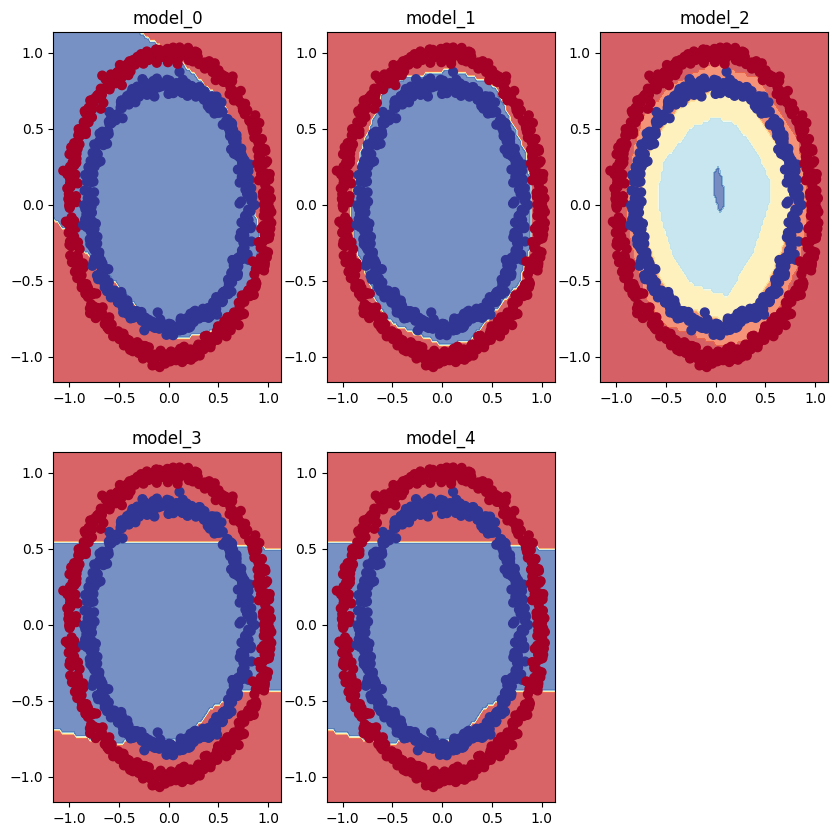

In [ ]:
# plotting
plt.figure(figsize = (10 , 10))
plt.subplot(2,3,1)
plt.title("model_0")
plot_decision_boundary(model = model_0 , X = X , y = y)
plt.subplot(2,3,2)
plt.title("model_1")
plot_decision_boundary(model = model_1 , X = X ,y = y)
plt.subplot(2,3,3)
plt.title("model_2")
plot_decision_boundary(model = model_2 , X = X ,y = y)
plt.subplot(2,3,4)
plt.title("model_3")
plot_decision_boundary(model = model_3 , X = X ,y = y)
plt.subplot(2,3,5)
plt.title("model_4")
plot_decision_boundary(model = model_3 , X = X ,y = y)

**Note :** extra colors in plot_decision images is because of diffrent functionality of `activations` or in other hand diffrent resulting numbers



### **Conclusion**

as we may be found the best model for our problem is `model_1`

the reason that we didn't choosed `model_2` is that `plot_decision_boundary` can not visualize it accurate

### Model properties

#### loss Curves

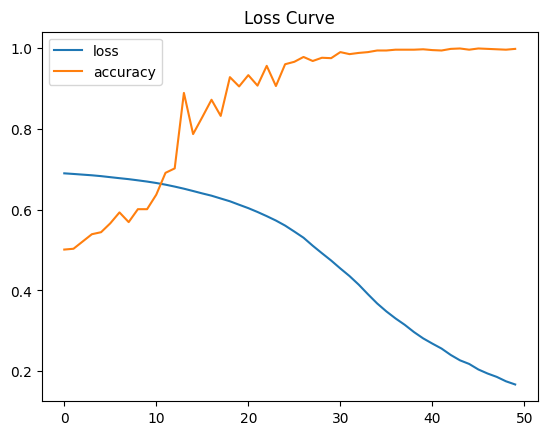

In [ ]:
pd.DataFrame(result_1.history).plot()
plt.title("Loss Curve") ;

#### model diagram

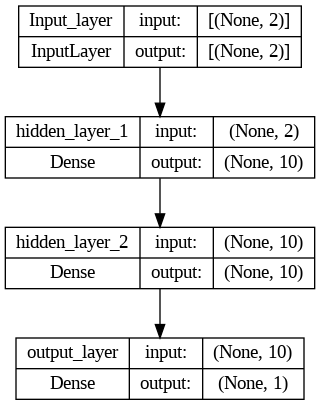

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1 , show_shapes = True)

#### model state

In [ ]:
model_1.evaluate(X , y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1617 - accuracy: 0.9990


[0.16170696914196014, 0.9990000128746033]

## Evaluate and improve model

In [ ]:
# making training and testing splits
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,
                                                      train_size = 800 ,
                                                      test_size = 200 ,
                                                      random_state = 42 ,
                                                      shuffle = True )
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

313/313 [==============================] - 1s 2ms/step
doing binary classification


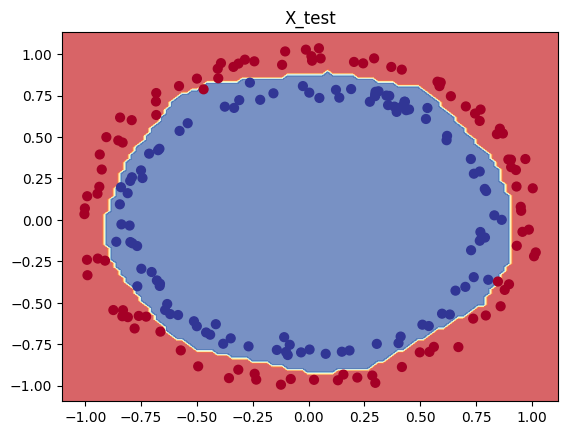

In [ ]:
plt.title("X_test")
plot_decision_boundary(model_1 , X_test , y_test)

### Finding best Laerning Rate

to find the best `Learning rate` we need some utilities containing :

* another model - for doing our expriments and finding best model
* learning rate callback function - a callback function for noting learning arte during epochs
* a modified loss curves


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_1_lr = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "input_layer") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_1" , activation = "relu") ,
    tf.keras.layers.Dense(10 , name = "hidden_layer_2" , activation = "relu") ,
    tf.keras.layers.Dense(1 , name = "output_layer" , activation = "sigmoid")
], name = "model_1_lr")

# 2 . Compile model
model_1_lr.compile(loss = tf.keras.losses.binary_crossentropy ,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

# 3 . learning rate callback function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : (1e-4 * 10**(epoch/10)))

# 4 . Fit model
results_1_lr = model_1_lr.fit(X_train , y_train , callbacks = [lr_scheduler] , epochs = 50)


Epoch 1/50
25/25 [==============================] - 2s 4ms/step - loss: 0.7250 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7146 - accuracy: 0.5000 - lr: 2.5119e-04
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.4812 - lr: 3.1623e-04
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7081 - accuracy: 0.4850 - lr: 3.9811e-04
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.4787 - lr: 5.0119e-04
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7023 -

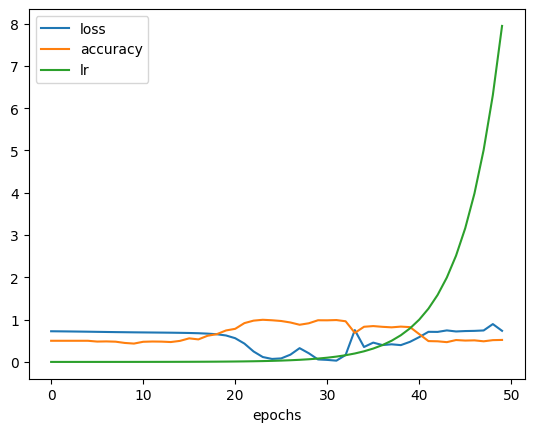

In [ ]:
pd.DataFrame(results_1_lr.history).plot(xlabel = "epochs") ;

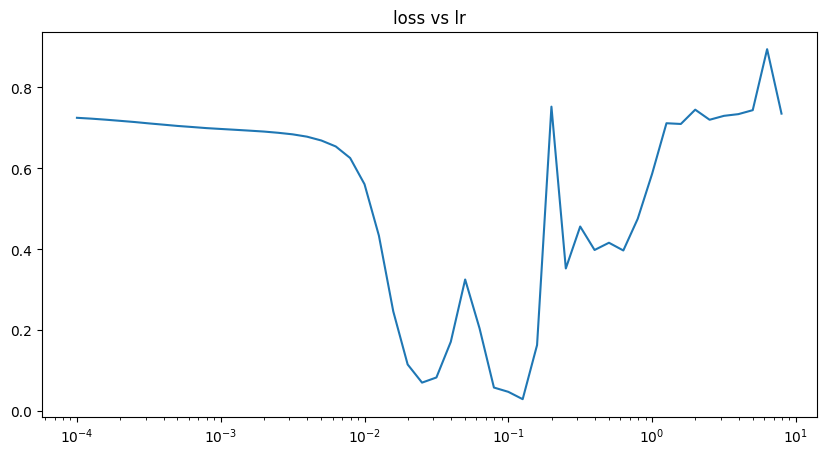

In [ ]:
lr_rate = 1e-4 * 10**(tf.range(50)/10)
plt.figure(figsize = (10,5)) ;
plt.semilogx(lr_rate , results_1_lr.history["loss"]) ;
plt.xlabel = "lr" ;
plt.ylabel = "loss" ;
plt.title("loss vs lr") ;

as we could see with 0.02 `learning rate` we would have the most accurate answers

### Improve model

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_1_lr_modified = tf.keras.Sequential([
    tf.keras.Input(shape = [2] , name = "Input") ,
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.relu , name = "hidden_1") ,
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.relu , name = "hidden_2") ,
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid , name = "output")
], name = "model_modified")
# 2 . Compile model
model_1_lr_modified.compile(loss = tf.keras.losses.binary_crossentropy ,
                            optimizer = tf.keras.optimizers.Adam(lr = 0.02) ,
                            metrics = ["accuracy"] )
# 3 . fit model
model_1_lr_modified.fit(X_train , y_train , epochs = 50)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.7001 - accuracy: 0.5113
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4925
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4825
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.4775
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.4963
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5013
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5050
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5113
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5150
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5300
Epoch 11/50
25/25 [

In [ ]:
model_1_lr_modified.evaluate(X_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.9750


[0.3809335231781006, 0.9750000238418579]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


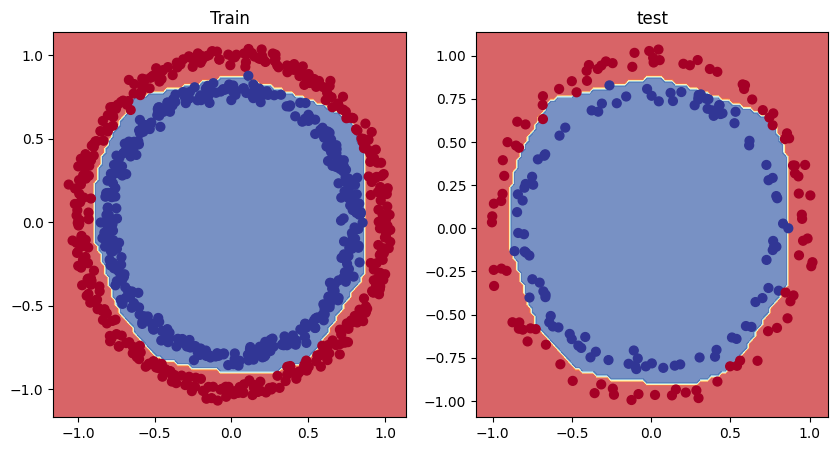

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1_lr_modified , X_train , y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1_lr_modified , X_test , y_test)

## More Evaluation Methods

* F1-Score
* Precision
* Classification report
* Confusion matrix

### Confusion Matrix

**Note :** for using `confusion_matrix` at first we must turn `prediction probilities` to `prediction lables`

In [ ]:
from sklearn.metrics import confusion_matrix

# Making prediction lables from prediction probilities
y_pred = tf.round(model_1_lr_modified(X_test))

confusion_matrix(y_test , y_pred)

array([[97,  3],
       [ 2, 98]])

we could use an imported function to prettify our `confusion matrix`

In [ ]:
# import prettifying confusion matrix function
request = requests.get("https://raw.githubusercontent.com/MohamadRacer/Tensorflow/main/pretiffy_confusion_matrix.py")
with open("confusion_matrix.py" , "wb") as file :
  file.write(request.content)
from confusion_matrix import make_confusion_matrix

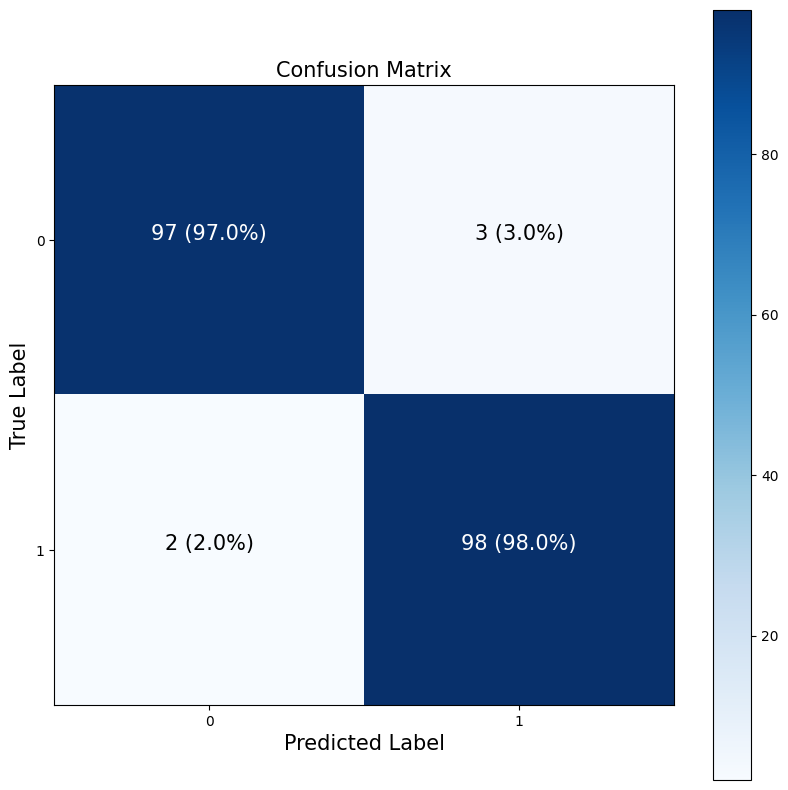

In [ ]:
make_confusion_matrix(y_test , y_pred)

## What does Activation Functions Does ?

In [ ]:
# sample data
A = tf.cast(tf.range(-10 , 10) , tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### `ReLU` activation

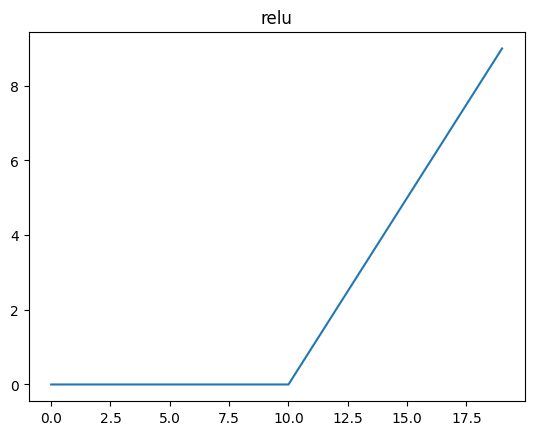

In [ ]:
plt.plot(tf.keras.activations.relu(A));
plt.title("relu") ;

### `sigmoid` activation

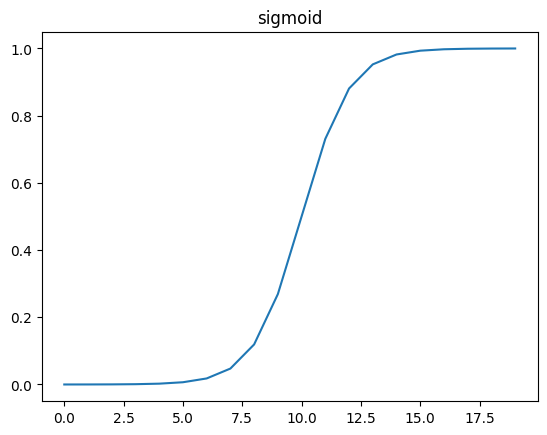

In [ ]:
plt.plot(tf.keras.activations.sigmoid(A)) ;
plt.title("sigmoid") ;

# Multi-class classification

## Prerequirities

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  requests
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

## Prepare Data

In [ ]:
# Import
from tensorflow.keras.datasets import fashion_mnist
# get data
X , y = fashion_mnist.load_data()
# glance at data
(len(X) , X[0].shape , X[1].shape) , (len(y) , y[0].shape , y[1].shape)

((2, (60000, 28, 28), (60000,)), (2, (10000, 28, 28), (10000,)))

In [ ]:
# spliting to train and test data sets
X_train , y_train = X[0] , X[1]
X_test , y_test = y[0] , y[1]
(X_train.shape , X_test.shape) , (y_train.shape , y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

In [ ]:
# a glance at lables
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

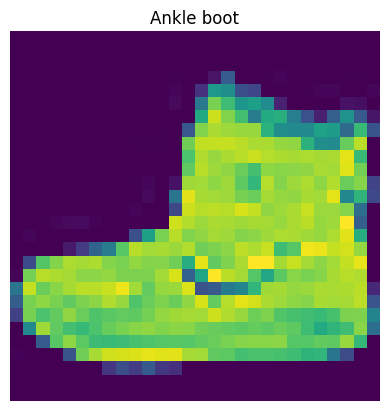

In [ ]:
# visulizing
plt.imshow(X_train[0]) ;
plt.title(class_names[y_train[0]])
plt.axis("off") ;

**Normalizing our data**

model's tend to look at our data in form of tensors who contain numbers between 0 , 1

**Note :**

before normalizing our data we used `CategoricalCrossentropy` but after normalization we use `SparseCategoricalCrossentropy` optimizer

In [ ]:
X_train_norm , X_test_norm = X_train/255.0 , X_test/255.0

## Build model

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_0 = tf.keras.Sequential([
    tf.keras.Input(shape = (28 , 28) , name = "input_layer") ,
    tf.keras.layers.Flatten() ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_1" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_2" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(10 , name = "output_layer" , activation = tf.keras.activations.softmax)
] , name = "model_0")
# 2 . Compile model
model_0.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# 3 . Fit model
results_0 = model_0.fit(X_train_norm , y_train , epochs = 10 , validation_data = (X_test_norm , y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7961 - accuracy: 0.7189 - val_loss: 0.5422 - val_accuracy: 0.8118
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4994 - accuracy: 0.8266 - val_loss: 0.5175 - val_accuracy: 0.8209
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4612 - accuracy: 0.8385 - val_loss: 0.4925 - val_accuracy: 0.8226
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4396 - accuracy: 0.8462 - val_loss: 0.4777 - val_accuracy: 0.8334
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4280 - accuracy: 0.8498 - val_loss: 0.4661 - val_accuracy: 0.8367
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4164 - accuracy: 0.8534 - val_loss: 0.5025 - val_accuracy: 0.8216
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4107 - accuracy: 0.8551 - val_loss: 0.4749 - val_accuracy:

In [ ]:
tf.argmax(model_0(X_train_norm[10:15]) ,axis = 1).numpy() , y_train[10:15]

(array([0, 9, 5, 5, 7]), array([0, 9, 5, 5, 7], dtype=uint8))

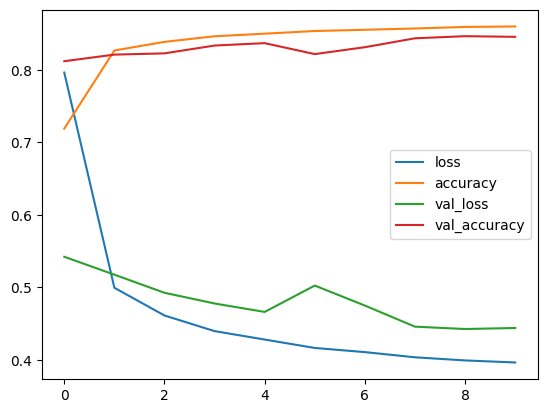

In [ ]:
pd.DataFrame(results_0.history).plot() ;

## Finding ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_0_lr = tf.keras.Sequential([
    tf.keras.Input(shape = (28 , 28) , name = "input_layer") ,
    tf.keras.layers.Flatten() ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_1" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_2" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(10 , name = "output_layer" , activation = tf.keras.activations.softmax)
] , name = "model_0_lr")
# 2 . Compile model
model_0_lr.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,
                   optimizer = tf.keras.optimizers.Adam() ,
                   metrics = ["accuracy"])
# 3 .learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/2.5))

# 4 . Fit model
results_0_lr = model_0_lr.fit(X_train_norm , y_train , epochs = 10 , callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7983 - accuracy: 0.3578 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9282 - accuracy: 0.7064 - lr: 2.5119e-04
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5822 - accuracy: 0.7989 - lr: 6.3096e-04
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5175 - accuracy: 0.8202 - lr: 0.0016
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5057 - accuracy: 0.8235 - lr: 0.0040
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5266 - accuracy: 0.8165 - lr: 0.0100
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5866 - accuracy: 0.7979 - lr: 0.0251
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2040 - accuracy: 0.4746 - lr: 0.0631
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step 

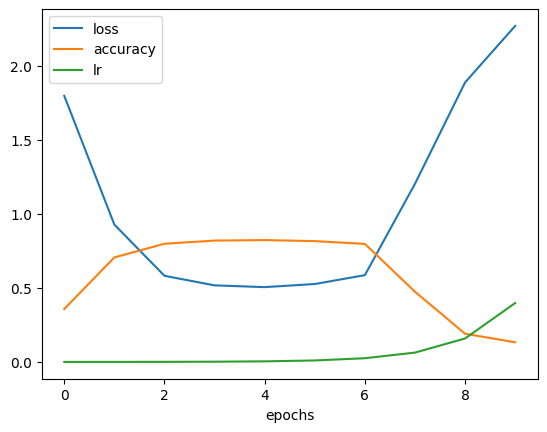

In [ ]:
pd.DataFrame(results_0_lr.history).plot(xlabel = "epochs") ;

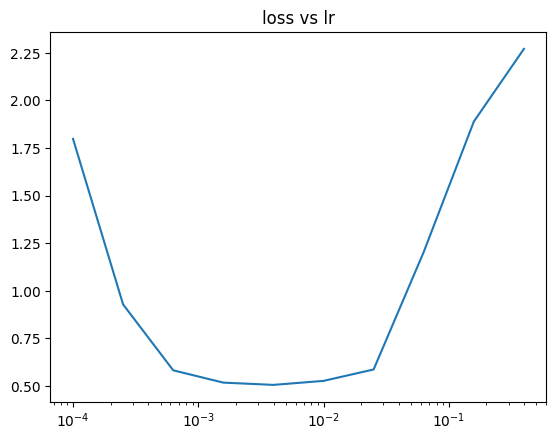

In [ ]:
lr_rate = 1e-4 * 10**(tf.cast(tf.range(10) , dtype = tf.float64)/2.5)
plt.semilogx(lr_rate , results_0_lr.history["loss"]) ;
plt.title("loss vs lr") ;
plt.xlabel = "learning rate" ;
plt.ylabel = "loss" ;

as we could see `0.05` is a good `learning rate` for our model

## Improve

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1 . Create model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape = (28 , 28) , name = "input_layer") ,
    tf.keras.layers.Flatten(name = "hidden_layer_0") ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_1" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(8 , name = "hidden_layer_2" , activation = tf.keras.activations.relu) ,
    tf.keras.layers.Dense(10 , name = "output_layer" , activation = tf.keras.activations.softmax)
] , name = "model_1")
# 2 . Compile model
model_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,
                optimizer = tf.keras.optimizers.Adam(learning_rate =0.002) ,
                metrics = ["accuracy"])
# 3 . Fit model
results_1 = model_1.fit(X_train_norm , y_train , epochs = 5 , validation_data = (X_test_norm , y_test))

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.7025 - accuracy: 0.7518 - val_loss: 0.5418 - val_accuracy: 0.8108
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4943 - accuracy: 0.8269 - val_loss: 0.5364 - val_accuracy: 0.8121
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4570 - accuracy: 0.8392 - val_loss: 0.4942 - val_accuracy: 0.8235
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8465 - val_loss: 0.4728 - val_accuracy: 0.8327
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4277 - accuracy: 0.8479 - val_loss: 0.5065 - val_accuracy: 0.8214


## Evaluate model

In [ ]:
# Make Prediction
tf.argmax(model_1(X_test[:5]) , axis = 1).numpy() , y_test[:5]

(array([9, 2, 1, 1, 6]), array([9, 2, 1, 1, 6], dtype=uint8))

In [ ]:
# Confusion Matrix
confusion_matrix(y_true = y_test , y_pred = tf.argmax(model_1(X_test_norm) , axis = 1))

array([[729,   2,   8,  89,   7,   2, 147,   0,  16,   0],
       [  4, 935,   2,  41,   6,   1,   6,   0,   5,   0],
       [ 10,   1, 621,  10, 295,   0,  46,   0,  16,   1],
       [ 16,   5,   5, 864,  67,   4,  33,   0,   6,   0],
       [  0,   0,  43,  23, 897,   0,  30,   0,   7,   0],
       [  0,   0,   1,   0,   0, 941,   0,  35,   3,  20],
       [103,   1,  99,  64, 301,   2, 405,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 941,   0,  25],
       [  2,   0,   6,  12,  14,   9,   9,   5, 943,   0],
       [  0,   0,   0,   0,   0,  11,   1,  50,   0, 938]])

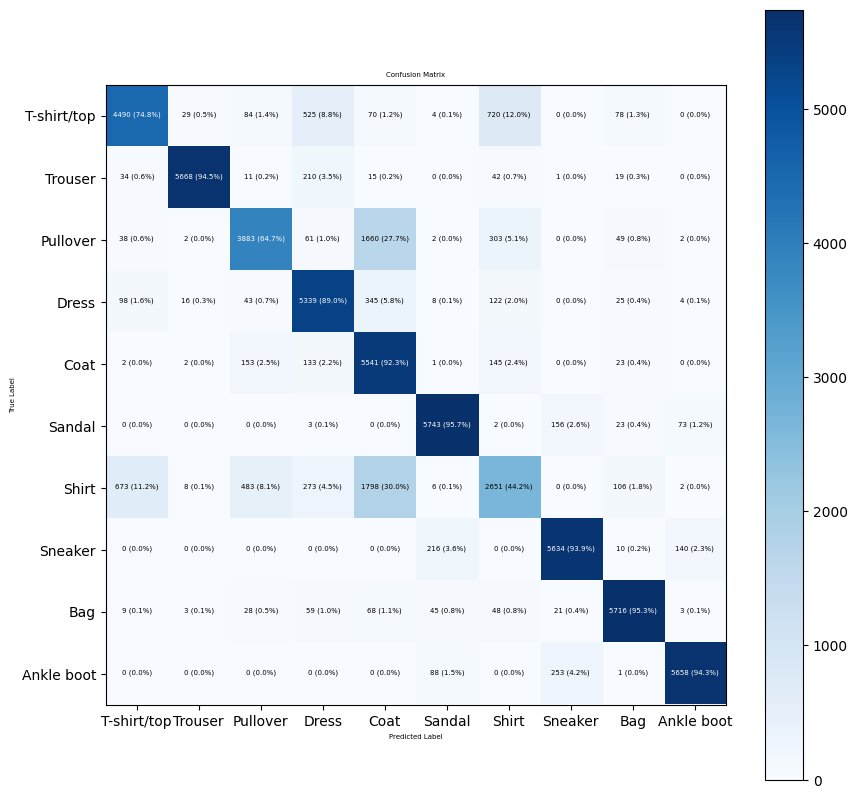

In [ ]:
make_confusion_matrix(classes=class_names ,
                      y_true= y_train ,
                      y_pred = tf.argmax(model_1(X_train_norm) , axis = 1) ,
                      text_size=5)

In [ ]:
## visulalize predictions
# 1 . importing plotting function
request = requests.get("https://raw.githubusercontent.com/MohamadRacer/Tensorflow/main/plot_random_image.py")
with open("plot_random_image.py" , "wb") as file :
  file.write(request.content)
from plot_random_image import plot_random_image

1/1 [==============================] - 0s 57ms/step


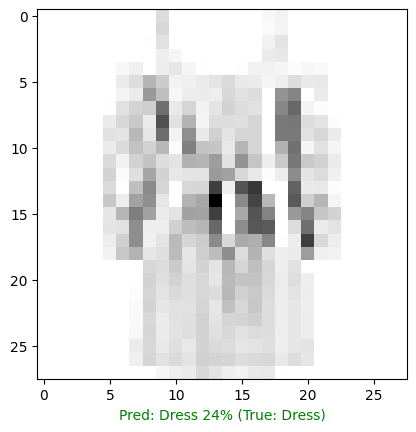

In [ ]:
# 2 . plot random images
plot_random_image(model = model_1 ,
                  images = X_test_norm ,
                  true_labels = y_test,
                  classes = class_names) ;

## A Glance at our model

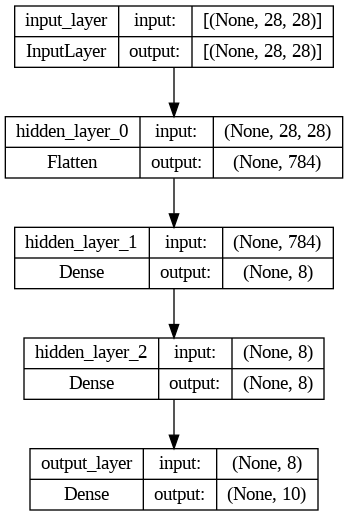

In [ ]:
# plot model
plot_model(model_1 , show_shapes = True)

In [ ]:
# model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_0 (Flatten)    (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 8)                 6280      
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 72        
                                                                 
 output_layer (Dense)        (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Count Parameters
model_1.count_params()

6442

In [ ]:
# evaluate model
model_1.evaluate(X_train_norm , y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4457 - accuracy: 0.8387


[0.44568851590156555, 0.8387166857719421]

In [ ]:
# getting output and input shapes
model_1.input_shape , model_1.output_shape

((None, 28, 28), (None, 10))

In [ ]:
# model layers , weights and biases
model_1.layers

In [ ]:
# finding layers
model_1.get_layer("hidden_layer_1")

In [ ]:
model_1.weights[0] # model_1.weights : a list of 6 items weights and biases per each Dense layer

<tf.Variable 'hidden_layer_1/kernel:0' shape=(784, 8) dtype=float32, numpy=
array([[-0.0802181 , -0.40248284, -0.05721002, ...,  0.23905231,
        -0.25997555, -0.17710845],
       [ 0.1887647 , -0.2036706 ,  0.41917646, ...,  0.46810025,
         0.08695114,  0.15438746],
       [ 0.09868149, -0.60273874, -0.0241345 , ...,  0.35731474,
        -0.10237955,  0.11670467],
       ...,
       [ 0.01994271, -0.06659519, -0.23522498, ...,  0.02988207,
        -0.01145978,  0.19488747],
       [-0.14903755, -0.09914281,  0.20269307, ..., -0.28844664,
        -0.32902068,  0.05683392],
       [ 0.28903937, -0.19671255, -0.04338245, ..., -0.1416707 ,
        -0.04930561,  0.18699546]], dtype=float32)>

**Note :** flatten layer doesn't have any weights and biases

In [ ]:
model_1.layers[0].get_weights()

[]

In [ ]:
model_1.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.44568852>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.8387167>}

In [ ]:
# model output
model_1.outputs , model_1.output

([<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>],
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output_layer')>)

In [ ]:
# model input
model_1.inputs , model_1.input

([<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_layer')>],
 <KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_layer')>)

In [ ]:
#  we could also do indexing and find input and output shape of layers
model_1.layers[1].output_shape , model_1.layers[2].input_shape

((None, 8), (None, 8))

In [ ]:
#  or we could do ....
model_1.layers[0].output_shape == model_1.layers[1].input_shape

True

In [ ]:
# Converting model to a json file
model_1.to_json()

'{"class_name": "Sequential", "config": {"name": "model_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_layer"}}, {"class_name": "Flatten", "config": {"name": "hidden_layer_0", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "hidden_layer_1", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "hidden_layer_2", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "